In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
%run datasets.ipynb

In [27]:
# make wave dataset with single feature.
X,y = make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
print("Coef_(w): ", lr.coef_)
print("Intercept_(y-intercept): ", lr.intercept_)

Coef_(w):  [0.39390555]
Intercept_(y-intercept):  -0.03180434302675973


In [28]:
# model is underfitting as Train and Test scores are very similar
print("Train score: ", lr.score(X_train, y_train))
print("Test score: ", lr.score(X_test, y_test))

Train score:  0.6700890315075756
Test score:  0.6593368596863701


In [29]:
# extended boston dataset with multiple(104) features
X, y = load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lrb = LinearRegression().fit(X_train, y_train)
print('Coef: ', lrb.coef_) # total number coef will be equals to number of features
print('Intercept: ', lrb.intercept_)

Coef:  [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.93666477e+01 -

In [30]:
# This much descripency in train and test scores means model is overfitting
print('Train score: ', lrb.score(X_train, y_train))
print('Test score: ', lrb.score(X_test, y_test))

Train score:  0.9520519609032729
Test score:  0.6074721959665842


In [45]:
from sklearn.linear_model import Ridge

rdg1 = Ridge().fit(X_train, y_train)

# Train score is lower and Test score is higher as compared to Linear Regression model
# means LR model was overfitting is proven.
print('Train score: {:.2f}'.format(rdg1.score(X_train, y_train)))
print('Test score: {:.2f}'.format(rdg1.score(X_test, y_test)))
print(rdg1.alpha)

Train score: 0.89
Test score: 0.75


In [46]:
# Increasing alpha forces coefficients to move more toward zero, 
# which decreases training set performance but might help generalization.
# Default is alpha=1.0 (alpha=0 means Linear Regression)
rdg4 = Ridge(alpha=0.4).fit(X_train, y_train)

print('Train score: ', rdg4.score(X_train, y_train))
print('Test score: ', rdg4.score(X_test, y_test))

Train score:  0.9083748995060447
Test score:  0.7705471512507132


In [47]:
rdg10 = Ridge(alpha=10).fit(X_train, y_train)

print('Train score: ', rdg10.score(X_train, y_train))
print('Test score: ', rdg10.score(X_test, y_test))

Train score:  0.7882787115369614
Test score:  0.6359411489177309


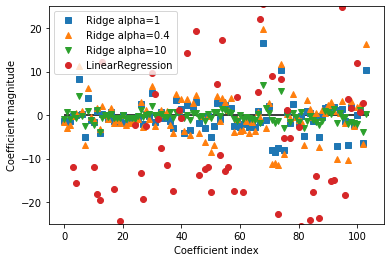

In [51]:
import matplotlib.pyplot as plt

plt.plot(rdg1.coef_, 's', label="Ridge alpha=1")
plt.plot(rdg4.coef_, '^', label="Ridge alpha=0.4")
plt.plot(rdg10.coef_, 'v', label="Ridge alpha=10")

plt.plot(lrb.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lrb.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()
# as can be seen in graph, as alpha increases, coef_ values decreases (moves closer to zero).

In [53]:
from sklearn.linear_model import Lasso

# alpha is 1.0 by default, when decreasig alpha, we also need to increase max_iter
# If alpha is too low, we remove the regularization and end up overfitting, with a result similar to LinearRegression
ls = Lasso().fit(X_train, y_train)

print('Train score: ', ls.score(X_train, y_train))
print('Test score: ', ls.score(X_test, y_test))
print('Number of features useed: ', np.sum(ls.coef_!=0))
print(ls.alpha)
print(ls.max_iter)

Train score:  0.29323768991114607
Test score:  0.20937503255272294
Number of features useed:  4
1.0
1000


In [55]:
ls001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print('Train score: ', ls001.score(X_train, y_train))
print('Test score: ', ls001.score(X_test, y_test))
print('Number of features useed: ', np.sum(ls001.coef_!=0))

Train score:  0.8962226511086501
Test score:  0.7656571174549989
Number of features useed:  33


In [56]:
ls0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ls0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ls0001.score(X_test, y_test)))
print("Number of features used:", np.sum(ls0001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

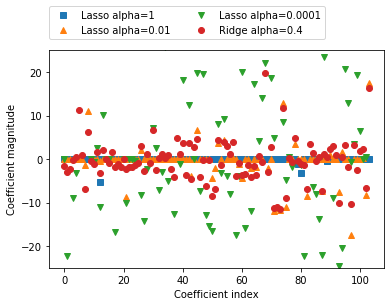

In [57]:
plt.plot(ls.coef_, 's', label="Lasso alpha=1")
plt.plot(ls001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(ls0001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(rdg4.coef_, 'o', label="Ridge alpha=0.4")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")